# Advanced Regression: Surprise Housing(Assignment)

### 1. Data Understanding and Exploration

In [604]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [605]:
# Reading the dataset
house = pd.read_csv("train.csv")

In [606]:
print(house.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [607]:
#Contains very less data(more than 95% missing data), so can be dropped
#MoSold is of not much value and YearBuilt is very similar to YearRemodAdd(is more significant)
house = house.drop(['Id','Alley','PoolQC','Fence','MiscFeature','MoSold','YearBuilt'], axis=1)

In [608]:
#Columns with missing data
house.columns[house.isnull().any()].tolist()

['LotFrontage',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [609]:
# head
house.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope    ...    OpenPorchSF EnclosedPorch 3SsnPorch  \
0    AllPub    Inside       Gtl    ...             61             0         0   
1    AllPub       FR2       Gtl    ...              0             0         0   
2    AllPub    Inside       Gtl    ...             42             0         0   
3    AllPub    Corner       Gtl    ...             35           272         0   
4    AllPub       FR2       Gtl    ...             84             0         0   

  ScreenPorch PoolArea  MiscVal  YrSold  SaleType SaleCondition SalePrice  
0           0        0        0    2008        WD        Normal    208500  
1           0        0        0    2007        WD        Normal    181500  
2           0        0        0    2008        WD        Normal    223500  
3           0        0        0    2006        WD       Abnorml    140000  
4           0        0        0    2008        WD        Normal    250000  

[5 rows x 74 columns]

In [610]:
#Imputing appropriate values in missing data columns.
h1=house["LotFrontage"].mean()
house["LotFrontage"].fillna(h1, inplace = True) 

In [611]:
h2=house["MasVnrArea"].median()
house["MasVnrArea"].fillna(h2, inplace = True) 

In [612]:
house["MasVnrType"].fillna("None", inplace = True)
house["BsmtQual"].fillna("No Basement", inplace = True)
house["BsmtCond"].fillna("No Basement", inplace = True)
house["BsmtExposure"].fillna("No Basement", inplace = True)
house["BsmtFinType1"].fillna("No Basement", inplace = True)
house["BsmtFinType2"].fillna("No Basement", inplace = True)

In [613]:
h8=house.loc[:,"Electrical"].mode()

In [614]:
h8

0    SBrkr
dtype: object

In [615]:
house["Electrical"].fillna("SBrkr", inplace = True)

In [616]:
house["FireplaceQu"].fillna("No Fireplace", inplace = True)
house["GarageType"].fillna("No Garage", inplace = True)

In [617]:
h11=house.loc[:,"GarageYrBlt"].mode()

In [618]:
h11

0    2005.0
dtype: float64

In [619]:
house["GarageYrBlt"].fillna(2005.0, inplace = True)

In [620]:
house["GarageFinish"].fillna("No Garage", inplace = True)
house["GarageQual"].fillna("No Garage", inplace = True)
house["GarageCond"].fillna("No Garage", inplace = True)

In [621]:
house.columns[house.isnull().any()].tolist()

[]

In [622]:
#Fetching current year
from datetime import date
current_date= date.today()
cy=current_date.year

In [623]:
#Coverting Year Columns into Ages
house['AgeOfHouse'] = cy-house.YearRemodAdd
house['AgeOfGarage'] = cy-house.GarageYrBlt
house['AgeAfterSale'] = cy-house.YrSold

In [624]:
house = house.drop(['YearRemodAdd','GarageYrBlt','YrSold'], axis=1)

In [625]:
house.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
    

#### Understanding the behaviour of some of the given Data

In [626]:
print(house.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 non-null object
MasVnrArea       1460 non-null float64
ExterQual        1460

In [627]:
house['MSSubClass'].astype('category').value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [628]:
house['MSZoning'].astype('category').value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [629]:
house['Street'].astype('category').value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [630]:
house['LotShape'].astype('category').value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

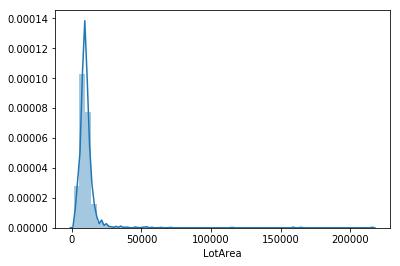

In [631]:
sns.distplot(house['LotArea'])
plt.show()

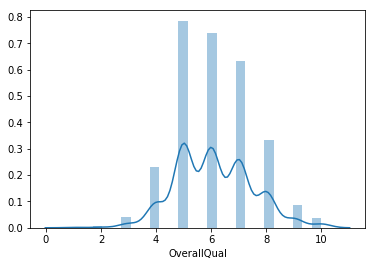

In [632]:
sns.distplot(house['OverallQual'])
plt.show()

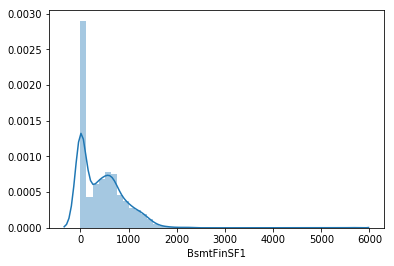

In [633]:
sns.distplot(house['BsmtFinSF1'])
plt.show()

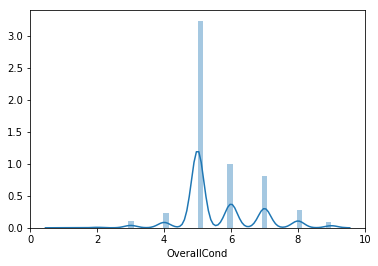

In [634]:
sns.distplot(house['OverallCond'])
plt.show()

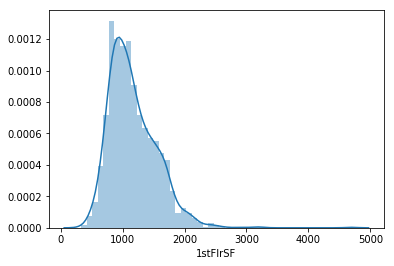

In [635]:
sns.distplot(house['1stFlrSF'])
plt.show()

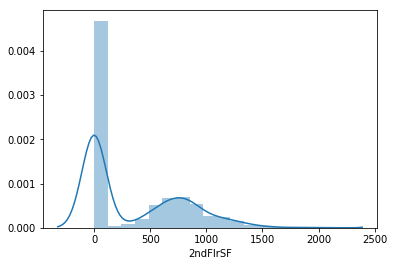

In [636]:
sns.distplot(house['2ndFlrSF'])
plt.show()

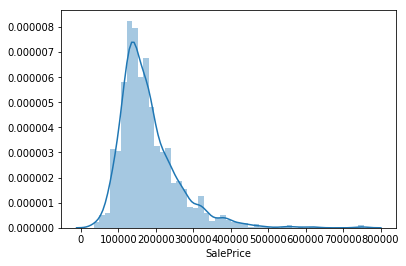

In [637]:
sns.distplot(house['SalePrice'])
plt.show()

In [638]:
#Log Transformation of the Target Variable to make it normally distributed
house['SalePrice'] = np.log(house.SalePrice)

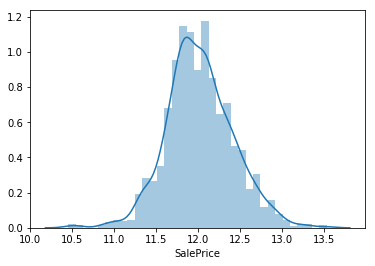

In [639]:
sns.distplot(house['SalePrice'])
plt.show()

### 2. Modifying the data-columns(Creating dummies)

In [640]:
# Considering all float and int datatypes from the dataset
house_numeric = house.select_dtypes(include=['float64', 'int64'])
house_numeric.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF      ...       OpenPorchSF  \
0         706           0        150          856      ...                61   
1         978           0        284         1262      ...                 0   
2         486           0        434          920      ...                42   
3         216           0        540          756      ...                35   
4         655           0        490         1145      ...                84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  SalePrice  \
0              0          0            0         0        0  12.247694   
1              0          0            0         0        0  12.109011   
2              0          0            0         0        0  12.317167   
3            272          0            0         0        0  11.849398   
4              0          0            0         0        0  12.429216   

   AgeOfHouse  AgeOfGarage  AgeAfterSale  
0          17         17.0            12  
1          44         44.0            13  
2          18         19.0            12  
3          50         22.0            14  
4          20         20.0            12  

[5 rows x 35 columns]

In [641]:
# Dropping column ID and others (they are considered as Categorical Var)
house_numeric = house_numeric.drop(['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','KitchenAbvGr','BedroomAbvGr','Fireplaces','GarageCars'], axis=1)
house_numeric.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF      ...       OpenPorchSF  \
0         706           0        150          856      ...                61   
1         978           0        284         1262      ...                 0   
2         486           0        434          920      ...                42   
3         216           0        540          756      ...                35   
4         655           0        490         1145      ...                84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  SalePrice  \
0              0          0            0         0        0  12.247694   
1              0          0            0         0        0  12.109011   
2              0          0            0         0        0  12.317167   
3            272          0            0         0        0  11.849398   
4              0          0            0         0        0  12.429216   

   AgeOfHouse  AgeOfGarage  AgeAfterSale  
0          17         17.0            12  
1          44         44.0            13  
2          18         19.0            12  
3          50         22.0            14  
4          20         20.0            12  

[5 rows x 27 columns]

In [642]:
print(house_numeric.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 27 columns):
MSSubClass       1460 non-null int64
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
MasVnrArea       1460 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
TotRmsAbvGrd     1460 non-null int64
GarageArea       1460 non-null int64
WoodDeckSF       1460 non-null int64
OpenPorchSF      1460 non-null int64
EnclosedPorch    1460 non-null int64
3SsnPorch        1460 non-null int64
ScreenPorch      1460 non-null int64
PoolArea         1460 non-null int64
MiscVal          1460 non-null int64
SalePrice        1460 non-null float64

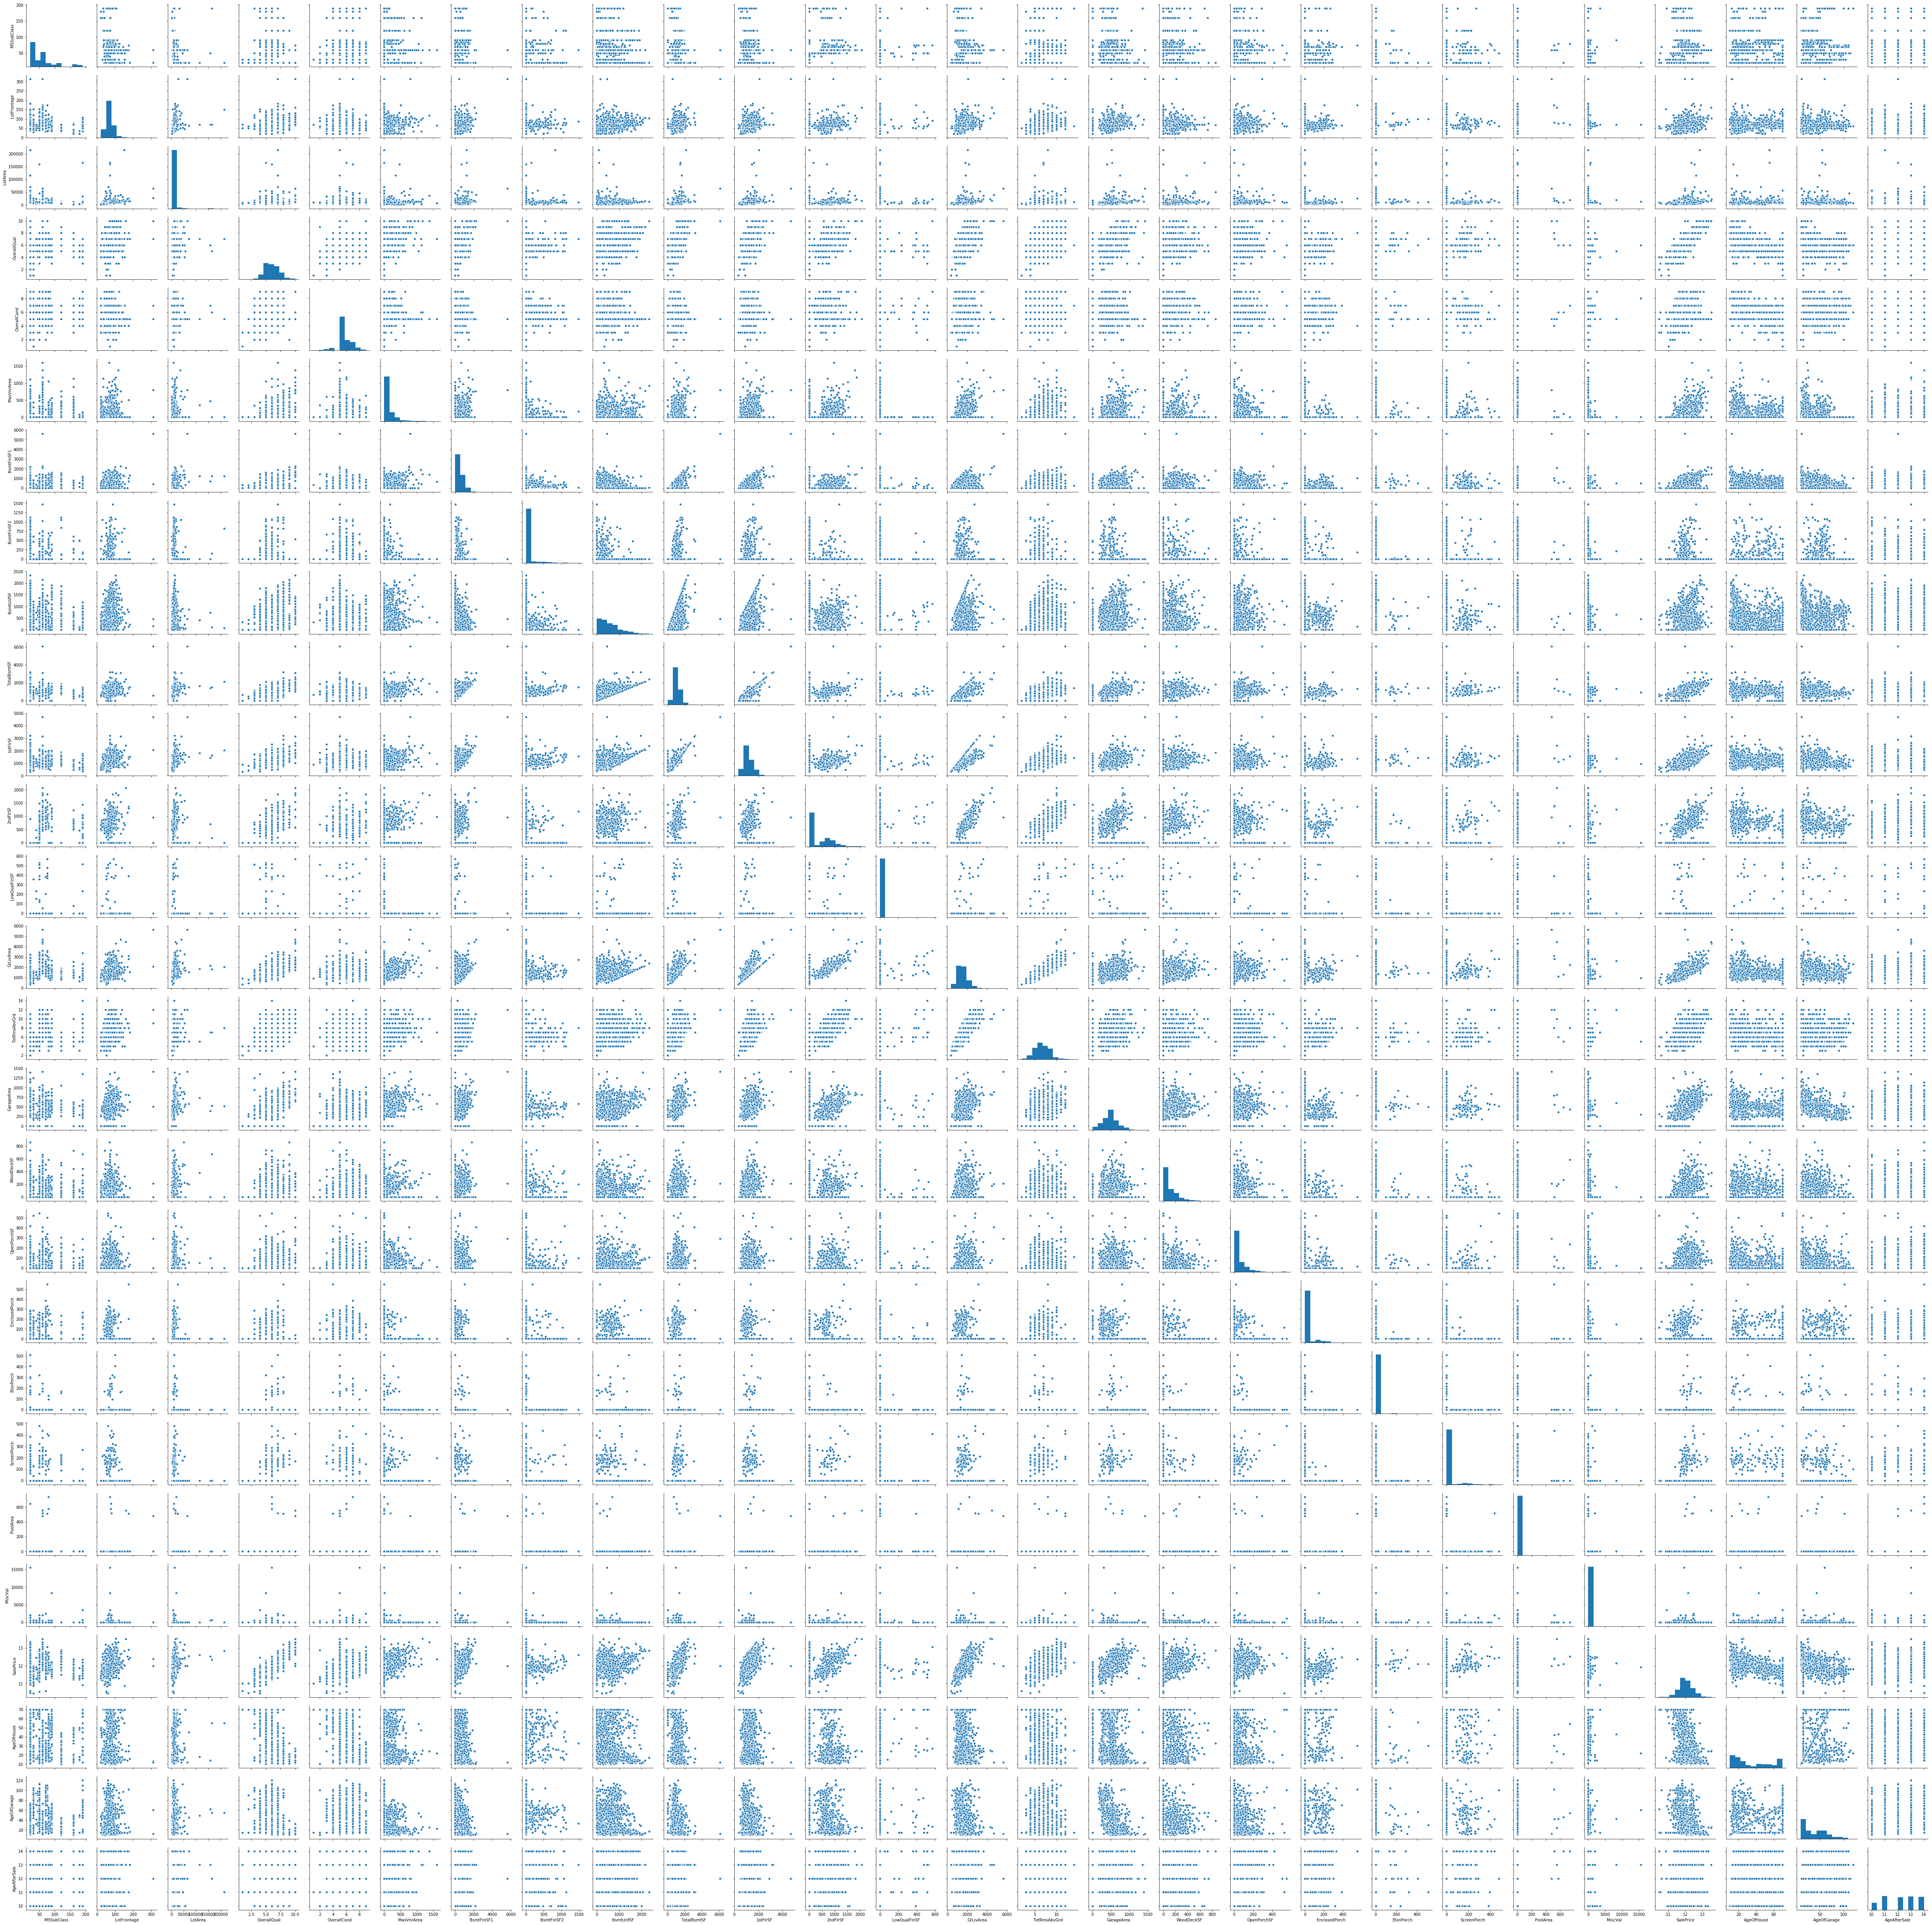

In [643]:
#PAIR-PLOTS
plt.figure(figsize=(20, 10))
sns.pairplot(house_numeric)
plt.show()

In [644]:
#As pair plots are difficult to understand, corr() is used.
cor = house_numeric.corr()
cor

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.357056 -0.139781     0.032628    -0.059316   
LotFrontage     -0.357056     1.000000  0.306795     0.234196    -0.052820   
LotArea         -0.139781     0.306795  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.234196  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.052820 -0.005636    -0.091932     1.000000   
MasVnrArea       0.023573     0.178699  0.103321     0.407252    -0.125694   
BsmtFinSF1      -0.069836     0.215828  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649     0.043340  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.122156 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.363358  0.260833     0.537808    -0.171098   
1stFlrSF        -0.251758     0.414266  0.299475     0.476224    -0.144203   
2ndFlrSF         0.307886     0.072483  0.050986     0.295493     0.028942   
LowQualFinSF     0.046474     0.036849  0.004779    -0.030429     0.025494   
GrLivArea        0.074853     0.368392  0.263116     0.593007    -0.079686   
TotRmsAbvGrd     0.040380     0.320146  0.190015     0.427452    -0.057583   
GarageArea      -0.098672     0.323663  0.180403     0.562022    -0.151521   
WoodDeckSF      -0.012579     0.077106  0.171698     0.238923    -0.003334   
OpenPorchSF     -0.006100     0.137454  0.084774     0.308819    -0.032589   
EnclosedPorch   -0.012037     0.009790 -0.018340    -0.113937     0.070356   
3SsnPorch       -0.043825     0.062335  0.020423     0.030371     0.025504   
ScreenPorch     -0.026030     0.037684  0.043160     0.064886     0.054811   
PoolArea         0.008283     0.180868  0.077672     0.065166    -0.001985   
MiscVal         -0.007683     0.001168  0.038068    -0.031406     0.068777   
SalePrice       -0.073959     0.336156  0.257320     0.817184    -0.036868   
AgeOfHouse      -0.040581    -0.082746 -0.013788    -0.550684    -0.073741   
AgeOfGarage     -0.098664    -0.038586  0.042198    -0.437998     0.299203   
AgeAfterSale     0.021407    -0.006768  0.014261     0.027347    -0.043950   

               MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
MSSubClass       0.023573   -0.069836   -0.065649  -0.140759    -0.238518   
LotFrontage      0.178699    0.215828    0.043340   0.122156     0.363358   
LotArea          0.103321    0.214103    0.111170  -0.002618     0.260833   
OverallQual      0.407252    0.239666   -0.059119   0.308159     0.537808   
OverallCond     -0.125694   -0.046231    0.040229  -0.136841    -0.171098   
MasVnrArea       1.000000    0.261256   -0.071330   0.113862     0.360067   
BsmtFinSF1       0.261256    1.000000   -0.050117  -0.495251     0.522396   
BsmtFinSF2      -0.071330   -0.050117    1.000000  -0.209294     0.104810   
BsmtUnfSF        0.113862   -0.495251   -0.209294   1.000000     0.415360   
TotalBsmtSF      0.360067    0.522396    0.104810   0.415360     1.000000   
1stFlrSF         0.339850    0.445863    0.097117   0.317987     0.819530   
2ndFlrSF         0.173800   -0.137079   -0.099260   0.004469    -0.174512   
LowQualFinSF    -0.068628   -0.064503    0.014807   0.028167    -0.033245   
GrLivArea        0.388052    0.208171   -0.009640   0.240257     0.454868   
TotRmsAbvGrd     0.279568    0.044316   -0.035227   0.250647     0.285573   
GarageArea       0.370884    0.296970   -0.018227   0.183303     0.486665   
WoodDeckSF       0.159991    0.204306    0.067898  -0.005316     0.232019   
OpenPorchSF      0.122528    0.111761    0.003093   0.129005     0.247264   
EnclosedPorch   -0.109907   -0.102303    0.036543  -0.002538    -0.095478   
3SsnPorch        0.019144    0.026451   -0.029993   0.020764     0.037384   
ScreenPorch      0.062248    0.062021    0.088871  -0.012579     0.084489   
PoolArea         0.011928    0.140491    0.041709  -0.035092     0.126053   
MiscVal         -0.029512    0.003571    0.004940  -0.02383

In [645]:
house_numeric.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'TotRmsAbvGrd',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'AgeOfHouse',
       'AgeOfGarage', 'AgeAfterSale'],
      dtype='object')

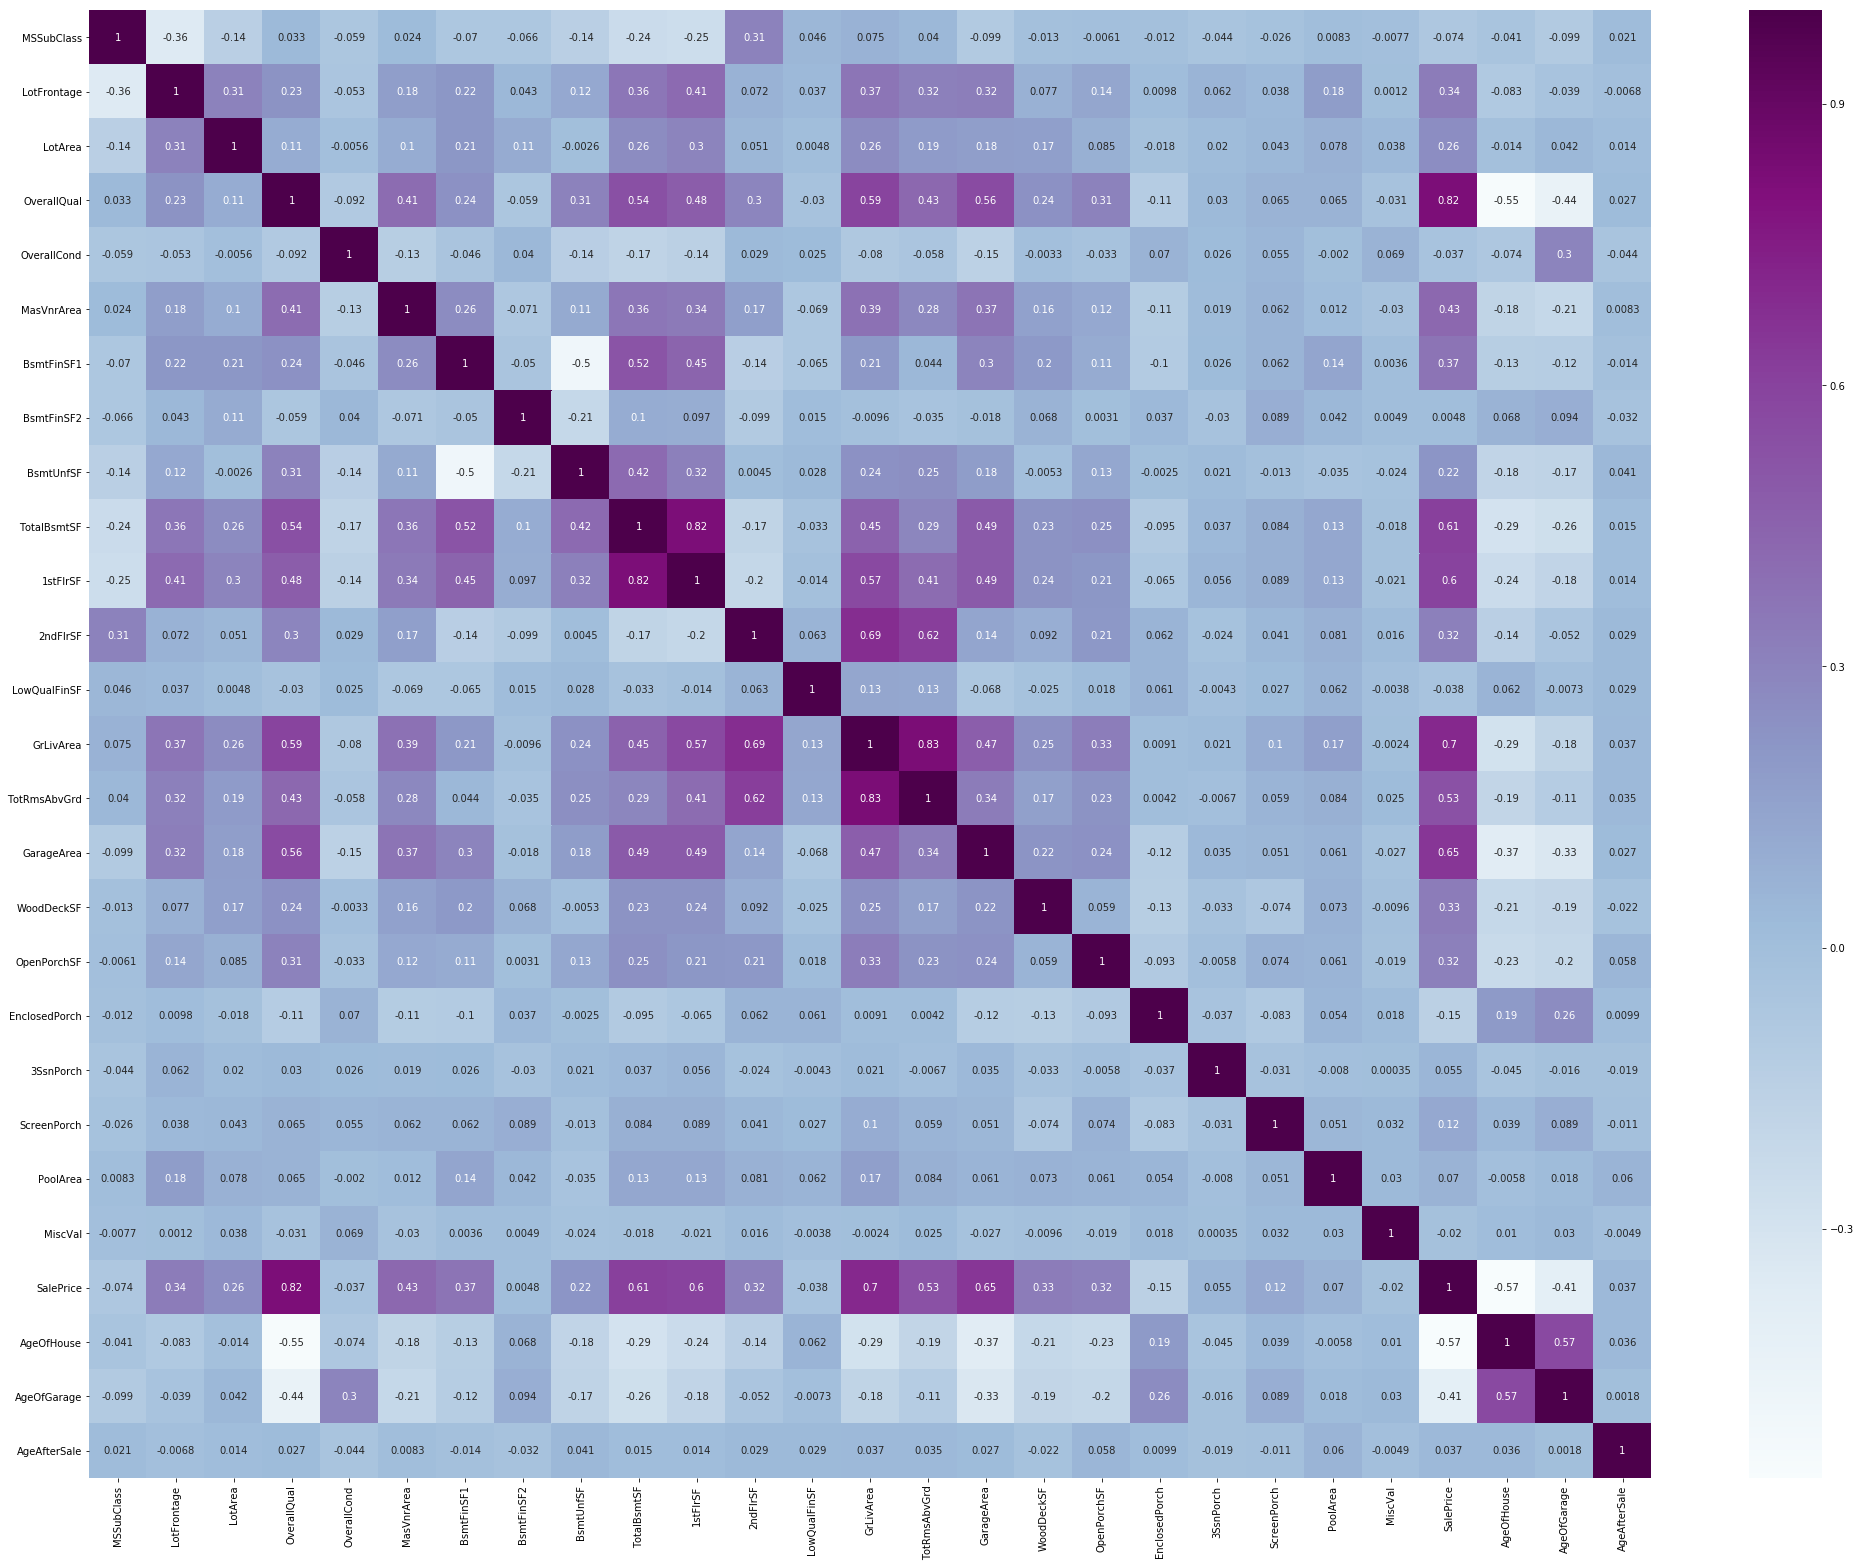

In [646]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(35,27))

# heatmap
sns.heatmap(cor, cmap="BuPu", annot=True)
plt.show()

### Inferences from the HeatMap:

Correlation of SalePrice with independent variables:
- SalePrice is highly (positively) correlated with ```OverallQual```,```GrLivArea```,```GarageArea```,```TotalBsmtSF```.

- SalePrice is negatively correlated to ```EnclosedPorch```,```MSSubClass``` and ```OverallCond``` (-0.10 approximately).

Correlation among independent variables:
- Many independent variables are highly correlated such as  TotalBsmtSF and 1stFlrSF, TotRmsAbvGrd and GrLivArea


Thus, while building the model, we'll have to pay attention to multicollinearity (especially linear models, such as linear and logistic regression, suffer more from multicollinearity).

In [647]:
#Creating 'object' datatype(for cat var)
house['BsmtFullBath'] = house['BsmtFullBath'].astype('object')
house['BsmtHalfBath'] = house['BsmtHalfBath'].astype('object')
house['FullBath'] = house['FullBath'].astype('object')
house['HalfBath'] = house['HalfBath'].astype('object')
house['BedroomAbvGr'] = house['BedroomAbvGr'].astype('object')
house['KitchenAbvGr'] = house['KitchenAbvGr'].astype('object')
house['Fireplaces'] = house['Fireplaces'].astype('object')
house['GarageCars'] = house['GarageCars'].astype('object')
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 non-null object
MasVnrArea       1460 non-null float64
ExterQual        1460

### 3. Data Preparation 

In [648]:
list(house.columns) 

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 

In [649]:
# creating dummy variables for categorical variables
# subset all categorical variables
house_categorical = house.select_dtypes(include=['object'])
house_categorical.head()

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2      ...      Fireplaces   FireplaceQu  \
0      CollgCr       Norm       Norm      ...               0  No Fireplace   
1      Veenker      Feedr       Norm      ...               1            TA   
2      CollgCr       Norm       Norm      ...               1            TA   
3      Crawfor       Norm       Norm      ...               1            Gd   
4      NoRidge       Norm       Norm      ...               1            TA   

  GarageType GarageFinish GarageCars GarageQual GarageCond PavedDrive  \
0     Attchd          RFn          2         TA         TA          Y   
1     Attchd          RFn          2         TA         TA          Y   
2     Attchd          RFn          2         TA         TA          Y   
3     Detchd          Unf          3         TA         TA          Y   
4     Attchd          RFn          3         TA         TA          Y   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal  

[5 rows x 47 columns]

In [650]:
# convert into dummies
house_dummies = pd.get_dummies(house_categorical, drop_first=True)
house_dummies.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0            0            0            1            0            1   
1            0            0            1            0            1   
2            0            0            1            0            1   
3            0            0            1            0            1   
4            0            0            1            0            1   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0             1                0                0   
1             0             0             1                0                0   
2             0             0             0                0                0   
3             0             0             0                0                0   
4             0             0             0                0                0   

           ...            SaleType_ConLI  SaleType_ConLw  SaleType_New  \
0          ...                         0               0             0   
1          ...                         0               0             0   
2          ...                         0               0             0   
3          ...                         0               0             0   
4          ...                         0               0             0   

   SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
0             0            1                      0                     0   
1             0            1                      0                     0   
2             0            1                      0                     0   
3             0            1                      0                     0   
4             0            1                      0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
0                     0                     1                      0  
1                     0                     1                      0  
2                     0                     1                      0  
3                     0                     0                      0  
4                     0                     1                      0  

[5 rows x 237 columns]

In [651]:
# drop categorical variables 
house = house.drop(list(house_categorical.columns), axis=1)

In [652]:
# concat dummy variables with X
house = pd.concat([house, house_dummies], axis=1)

### 3. Converting into Train-Test Data(Train)

In [653]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(house, train_size = 0.7, test_size = 0.3, random_state = 100)

In [654]:
#Using MinMax Scaling(due to presence of outliers)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [655]:
list(df_train.columns)

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'TotRmsAbvGrd',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SalePrice',
 'AgeOfHouse',
 'AgeOfGarage',
 'AgeAfterSale',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Pave',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_NoSeWa',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitch

In [656]:
# Applying scaler()
num_vars = [
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'TotRmsAbvGrd',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SalePrice',
 'AgeOfHouse',
 'AgeOfGarage',
 'AgeAfterSale',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Pave',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_NoSeWa',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_Mitchel',
 'Neighborhood_NAmes',
 'Neighborhood_NPkVill',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_Sawyer',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'Condition1_Feedr',
 'Condition1_Norm',
 'Condition1_PosA',
 'Condition1_PosN',
 'Condition1_RRAe',
 'Condition1_RRAn',
 'Condition1_RRNe',
 'Condition1_RRNn',
 'Condition2_Feedr',
 'Condition2_Norm',
 'Condition2_PosA',
 'Condition2_PosN',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'HouseStyle_1.5Unf',
 'HouseStyle_1Story',
 'HouseStyle_2.5Fin',
 'HouseStyle_2.5Unf',
 'HouseStyle_2Story',
 'HouseStyle_SFoyer',
 'HouseStyle_SLvl',
 'RoofStyle_Gable',
 'RoofStyle_Gambrel',
 'RoofStyle_Hip',
 'RoofStyle_Mansard',
 'RoofStyle_Shed',
 'RoofMatl_CompShg',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'RoofMatl_Tar&Grv',
 'RoofMatl_WdShake',
 'RoofMatl_WdShngl',
 'Exterior1st_AsphShn',
 'Exterior1st_BrkComm',
 'Exterior1st_BrkFace',
 'Exterior1st_CBlock',
 'Exterior1st_CemntBd',
 'Exterior1st_HdBoard',
 'Exterior1st_ImStucc',
 'Exterior1st_MetalSd',
 'Exterior1st_Plywood',
 'Exterior1st_Stone',
 'Exterior1st_Stucco',
 'Exterior1st_VinylSd',
 'Exterior1st_Wd Sdng',
 'Exterior1st_WdShing',
 'Exterior2nd_AsphShn',
 'Exterior2nd_Brk Cmn',
 'Exterior2nd_BrkFace',
 'Exterior2nd_CBlock',
 'Exterior2nd_CmentBd',
 'Exterior2nd_HdBoard',
 'Exterior2nd_ImStucc',
 'Exterior2nd_MetalSd',
 'Exterior2nd_Other',
 'Exterior2nd_Plywood',
 'Exterior2nd_Stone',
 'Exterior2nd_Stucco',
 'Exterior2nd_VinylSd',
 'Exterior2nd_Wd Sdng',
 'Exterior2nd_Wd Shng',
 'MasVnrType_BrkFace',
 'MasVnrType_None',
 'MasVnrType_Stone',
 'ExterQual_Fa',
 'ExterQual_Gd',
 'ExterQual_TA',
 'ExterCond_Fa',
 'ExterCond_Gd',
 'ExterCond_Po',
 'ExterCond_TA',
 'Foundation_CBlock',
 'Foundation_PConc',
 'Foundation_Slab',
 'Foundation_Stone',
 'Foundation_Wood',
 'BsmtQual_Fa',
 'BsmtQual_Gd',
 'BsmtQual_No Basement',
 'BsmtQual_TA',
 'BsmtCond_Gd',
 'BsmtCond_No Basement',
 'BsmtCond_Po',
 'BsmtCond_TA',
 'BsmtExposure_Gd',
 'BsmtExposure_Mn',
 'BsmtExposure_No',
 'BsmtExposure_No Basement',
 'BsmtFinType1_BLQ',
 'BsmtFinType1_GLQ',
 'BsmtFinType1_LwQ',
 'BsmtFinType1_No Basement',
 'BsmtFinType1_Rec',
 'BsmtFinType1_Unf',
 'BsmtFinType2_BLQ',
 'BsmtFinType2_GLQ',
 'BsmtFinType2_LwQ',
 'BsmtFinType2_No Basement',
 'BsmtFinType2_Rec',
 'BsmtFinType2_Unf',
 'Heating_GasA',
 'Heating_GasW',
 'Heating_Grav',
 'Heating_OthW',
 'Heating_Wall',
 'HeatingQC_Fa',
 'HeatingQC_Gd',
 'HeatingQC_Po',
 'HeatingQC_TA',
 'CentralAir_Y',
 'Electrical_FuseF',
 'Electrical_FuseP',
 'Electrical_Mix',
 'Electrical_SBrkr',
 'BsmtFullBath_1',
 'BsmtFullBath_2',
 'BsmtFullBath_3',
 'BsmtHalfBath_1',
 'BsmtHalfBath_2',
 'FullBath_1',
 'FullBath_2',
 'FullBath_3',
 'HalfBath_1',
 'HalfBath_2',
 'BedroomAbvGr_1',
 'BedroomAbvGr_2',
 'BedroomAbvGr_3',
 'BedroomAbvGr_4',
 'BedroomAbvGr_5',
 'BedroomAbvGr_6',
 'BedroomAbvGr_8',
 'KitchenAbvGr_1',
 'KitchenAbvGr_2',
 'KitchenAbvGr_3',
 'KitchenQual_Fa',
 'KitchenQual_Gd',
 'KitchenQual_TA',
 'Functional_Maj2',
 'Functional_Min1',
 'Functional_Min2',
 'Functional_Mod',
 'Functional_Sev',
 'Functional_Typ',
 'Fireplaces_1',
 'Fireplaces_2',
 'Fireplaces_3',
 'FireplaceQu_Fa',
 'FireplaceQu_Gd',
 'FireplaceQu_No Fireplace',
 'FireplaceQu_Po',
 'FireplaceQu_TA',
 'GarageType_Attchd',
 'GarageType_Basment',
 'GarageType_BuiltIn',
 'GarageType_CarPort',
 'GarageType_Detchd',
 'GarageType_No Garage',
 'GarageFinish_No Garage',
 'GarageFinish_RFn',
 'GarageFinish_Unf',
 'GarageCars_1',
 'GarageCars_2',
 'GarageCars_3',
 'GarageCars_4',
 'GarageQual_Fa',
 'GarageQual_Gd',
 'GarageQual_No Garage',
 'GarageQual_Po',
 'GarageQual_TA',
 'GarageCond_Fa',
 'GarageCond_Gd',
 'GarageCond_No Garage',
 'GarageCond_Po',
 'GarageCond_TA',
 'PavedDrive_P',
 'PavedDrive_Y',
 'SaleType_CWD',
 'SaleType_Con',
 'SaleType_ConLD',
 'SaleType_ConLI',
 'SaleType_ConLw',
 'SaleType_New',
 'SaleType_Oth',
 'SaleType_WD',
 'SaleCondition_AdjLand',
 'SaleCondition_Alloca',
 'SaleCondition_Family',
 'SaleCondition_Normal',
 'SaleCondition_Partial']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [657]:
df_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
210     0.058824     0.157534  0.019306     0.444444        0.625        0.00   
318     0.235294     0.236301  0.039403     0.666667        0.500        0.16   
239     0.176471     0.106164  0.033981     0.555556        0.375        0.00   
986     0.176471     0.130137  0.017931     0.555556        0.875        0.00   
1416    1.000000     0.133562  0.046139     0.333333        0.625        0.00   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF          ...            \
210     0.082920         0.0   0.169521     0.141408          ...             
318     0.174876         0.0   0.154110     0.220458          ...             
239     0.016655         0.0   0.274401     0.120295          ...             
986     0.000000         0.0   0.207620     0.079378          ...             
1416    0.000000         0.0   0.332620     0.127169          ...             

      SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
210              0.0             0.0           0.0           0.0          1.0   
318              0.0             0.0           0.0           0.0          1.0   
239              0.0             0.0           0.0           0.0          1.0   
986              0.0             0.0           0.0           0.0          1.0   
1416             0.0             0.0           0.0           0.0          1.0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
210                     0.0                   0.0                   0.0   
318                     0.0                   0.0                   0.0   
239                     0.0                   0.0                   0.0   
986                     0.0                   0.0                   0.0   
1416                    0.0                   0.0                   0.0   

      SaleCondition_Normal  SaleCondition_Partial  
210                    1.0                    0.0  
318                    1.0                    0.0  
239                    1.0                    0.0  
986                    1.0                    0.0  
1416                   1.0                    0.0  

[5 rows x 264 columns]

In [658]:
df_train.describe()

MSSubClass  LotFrontage      LotArea  OverallQual  OverallCond  \
count  1021.000000  1021.000000  1021.000000  1021.000000  1021.000000   
mean      0.226134     0.166872     0.042143     0.565676     0.572723   
std       0.254755     0.075612     0.048226     0.155529     0.136506   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.133562     0.027923     0.444444     0.500000   
50%       0.176471     0.167979     0.037531     0.555556     0.500000   
75%       0.294118     0.195205     0.046943     0.666667     0.625000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

        MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF  \
count  1021.000000  1021.000000  1021.000000  1021.000000  1021.000000   
mean      0.065306     0.079337     0.033980     0.241388     0.173773   
std       0.117088     0.082377     0.115907     0.192066     0.075145   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.092466     0.129787   
50%       0.000000     0.069454     0.000000     0.197774     0.162357   
75%       0.098750     0.126152     0.000000     0.345034     0.215057   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               ...            SaleType_ConLI  SaleType_ConLw  SaleType_New  \
count          ...               1021.000000     1021.000000   1021.000000   
mean           ...                  0.002938        0.003918      0.078355   
std            ...                  0.054153        0.062500      0.268860   
min            ...                  0.000000        0.000000      0.000000   
25%            ...                  0.000000        0.000000      0.000000   
50%            ...                  0.000000        0.000000      0.000000   
75%            ...                  0.000000        0.000000      0.000000   
max            ...                  1.000000        1.000000      1.000000   

       SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
count   1021.000000  1021.000000            1021.000000           1021.000000   
mean       0.002938     0.870715               0.002938              0.007835   
std        0.054153     0.335680               0.054153              0.088214   
min        0.000000     0.000000               0.000000              0.000000   
25%        0.000000     1.000000               0.000000              0.000000   
50%        0.000000     1.000000               0.000000              0.000000   
75%        0.000000     1.000000               0.000000              0.000000   
max        1.000000     1.000000               1.000000              1.000000   

       SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
count           1021.000000           1021.000000            1021.000000  
mean               0.013712              0.825661               0.078355  
std                0.116350              0.379587               0.268860  
min                0.000000              0.000000               0.000000  
25%                0.000000              1.000000               0.000000  
50%                0.000000              1.000000               0.000000  
75%                0.000000              1.000000               0.000000  
max                1.000000              1.000000               1.000000  

[8 rows x 264 columns]

In [659]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [660]:
# Check all the columns of the dataframe
X_train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=263)

In [661]:
#Build a linear model
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)
lr1 = sm.OLS(y_train, X_train_lm).fit()
lr1.params

const                   -0.572315
MSSubClass              -0.039426
LotFrontage              0.036136
LotArea                  0.183117
OverallQual              0.116543
OverallCond              0.079477
MasVnrArea               0.000351
BsmtFinSF1               0.180178
BsmtFinSF2               0.034957
BsmtUnfSF                0.028956
TotalBsmtSF              0.185940
1stFlrSF                 0.181552
2ndFlrSF                 0.099711
LowQualFinSF             0.001384
GrLivArea                0.197674
TotRmsAbvGrd             0.008712
GarageArea               0.045973
WoodDeckSF               0.022983
OpenPorchSF              0.007039
EnclosedPorch            0.003545
3SsnPorch                0.023622
ScreenPorch              0.017113
PoolArea                 0.015907
MiscVal                  0.003456
AgeOfHouse              -0.025276
AgeOfGarage             -0.012139
AgeAfterSale             0.004336
MSZoning_FV              0.145555
MSZoning_RH              0.140753
MSZoning_RL   

In [662]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     73.34
Date:                Mon, 24 Aug 2020   Prob (F-statistic):               0.00
Time:                        17:19:40   Log-Likelihood:                 2271.4
No. Observations:                1021   AIC:                            -4049.
Df Residuals:                     774   BIC:                            -2831.
Df Model:                         246                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [663]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features       VIF
262     SaleCondition_Partial       inf
237              GarageCars_4       inf
235              GarageCars_2       inf
234              GarageCars_1       inf
231    GarageFinish_No Garage       inf
230      GarageType_No Garage       inf
222  FireplaceQu_No Fireplace       inf
218              Fireplaces_2       inf
217              Fireplaces_1       inf
207            KitchenAbvGr_3       inf
206            KitchenAbvGr_2       inf
205            KitchenAbvGr_1       inf
165  BsmtFinType1_No Basement       inf
155      BsmtCond_No Basement       inf
152      BsmtQual_No Basement       inf
123        Exterior2nd_CBlock       inf
120       Exterior2nd_AsphShn       inf
109        Exterior1st_CBlock       inf
106       Exterior1st_AsphShn       inf
236              GarageCars_3       inf
219              Fireplaces_3       inf
238             GarageQual_Fa       inf
8                   BsmtUnfSF       inf
7                  BsmtFinSF2       inf
6                  BsmtFinSF1       inf
9                 TotalBsmtSF       inf
10                   1stFlrSF       inf
11                   2ndFlrSF       inf
12               LowQualFinSF       inf
13                  GrLivArea       inf
..                        ...       ...
17                OpenPorchSF  1.850000
32               LotShape_IR3  1.840000
112       Exterior1st_ImStucc  1.830000
18              EnclosedPorch  1.800000
70            Condition1_PosA  1.760000
180              HeatingQC_Gd  1.740000
190            BsmtFullBath_3  1.720000
191            BsmtHalfBath_1  1.660000
37           Utilities_NoSeWa  1.620000
16                 WoodDeckSF  1.610000
260      SaleCondition_Family  1.580000
44       Neighborhood_Blueste  1.550000
39              LotConfig_FR2  1.530000
254            SaleType_ConLw  1.490000
181              HeatingQC_Po  1.480000
22                    MiscVal  1.480000
250              SaleType_CWD  1.470000
31               LotShape_IR2  1.450000
253            SaleType_ConLI  1.400000
251              SaleType_Con  1.400000
40              LotConfig_FR3  1.400000
20                ScreenPorch  1.390000
25               AgeAfterSale  1.380000
256              SaleType_Oth  1.370000
19                  3SsnPorch  1.360000
149           Foundation_Wood  1.350000
74            Condition1_RRNe  1.270000
128         Exterior2nd_Other       NaN
143              ExterCond_Po       NaN
186            Electrical_Mix       NaN

[263 rows x 2 columns]

### 4. Checking the Error Terms Distribution

In [664]:
y_train_price = lr1.predict(X_train_lm)

In [665]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5,0,'Errors')

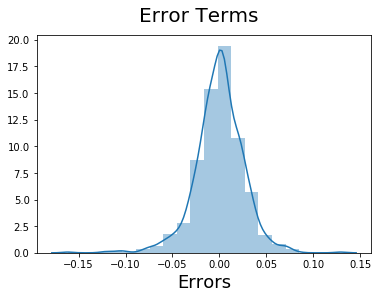

In [666]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

 IT IS A NORMAL DISTRIBUTION, WHICH SAYS WE ARE DOING FINE.

### 5. Model testing for Test Data

In [667]:
# Applying scaler() to all the columns except the '2 levelled ones' and 'dummy' variables
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [668]:
df_test.describe()

MSSubClass  LotFrontage     LotArea  OverallQual  OverallCond  \
count  438.000000   438.000000  438.000000   438.000000   438.000000   
mean     0.195810     0.170389    0.042633     0.568493     0.570205   
std      0.233634     0.075016    0.043013     0.149493     0.145223   
min      0.000000     0.000000   -0.000828     0.000000     0.125000   
25%      0.000000     0.133562    0.029354     0.444444     0.500000   
50%      0.176471     0.167979    0.037005     0.555556     0.500000   
75%      0.235294     0.202055    0.047823     0.666667     0.625000   
max      1.000000     1.000000    0.736888     1.000000     1.000000   

       MasVnrArea  BsmtFinSF1  BsmtFinSF2   BsmtUnfSF  TotalBsmtSF  \
count  438.000000  438.000000  438.000000  438.000000   438.000000   
mean     0.062596    0.076725    0.026057    0.246481     0.171395   
std      0.102883    0.077114    0.092662    0.182468     0.063466   
min      0.000000    0.000000    0.000000    0.000000     0.000000   
25%      0.000000    0.000000    0.000000    0.108947     0.133061   
50%      0.000000    0.063873    0.000000    0.214255     0.161293   
75%      0.108750    0.125753    0.000000    0.346533     0.204337   
max      0.575625    0.387668    0.764586    0.828339     0.413093   

               ...            SaleType_ConLI  SaleType_ConLw  SaleType_New  \
count          ...                438.000000      438.000000    438.000000   
mean           ...                  0.004566        0.002283      0.095890   
std            ...                  0.067496        0.047782      0.294778   
min            ...                  0.000000        0.000000      0.000000   
25%            ...                  0.000000        0.000000      0.000000   
50%            ...                  0.000000        0.000000      0.000000   
75%            ...                  0.000000        0.000000      0.000000   
max            ...                  1.000000        1.000000      1.000000   

       SaleType_Oth  SaleType_WD  SaleCondition_AdjLand  SaleCondition_Alloca  \
count         438.0   438.000000             438.000000            438.000000   
mean            0.0     0.860731               0.002283              0.009132   
std             0.0     0.346623               0.047782              0.095235   
min             0.0     0.000000               0.000000              0.000000   
25%             0.0     1.000000               0.000000              0.000000   
50%             0.0     1.000000               0.000000              0.000000   
75%             0.0     1.000000               0.000000              0.000000   
max             0.0     1.000000               1.000000              1.000000   

       SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  
count            438.000000            438.000000             438.000000  
mean               0.013699              0.808219               0.102740  
std                0.116370              0.394152               0.303966  
min                0.000000              0.000000               0.000000  
25%                0.000000              1.000000               0.000000  
50%                0.000000              1.000000               0.000000  
75%                0.000000              1.000000               0.000000  
max                1.000000              1.000000               1.000000  

[8 rows x 264 columns]

In [669]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [670]:
# Adding constant variable to test dataframe
X_test_m18 = sm.add_constant(X_test)

In [671]:
# Making predictions using the TRAINING model

y_pred = lr1.predict(X_test_m18)

Text(0,0.5,'y_pred')

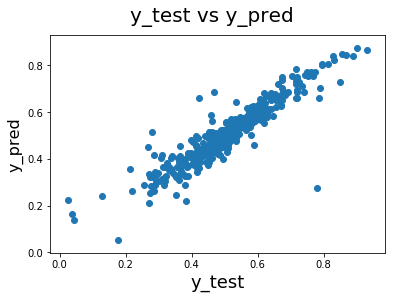

In [672]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

This is a linear graph. Hence we can infer that the training model workd well with the test data

### 6. Model Building and Evaluation

### Ridge and Lasso Regression

## Ridge Regression

In [673]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_lm, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.9s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [674]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       0.005789         0.000199        -0.030844         -0.018124   
1       0.005186         0.000000        -0.030804         -0.018143   
2       0.005587         0.000797        -0.030654         -0.018424   
3       0.006189         0.000792        -0.031143         -0.019483   
4       0.004189         0.000798        -0.031413         -0.020115   

  param_alpha             params  rank_test_score  split0_test_score  \
0      0.0001  {'alpha': 0.0001}                3          -0.030036   
1       0.001   {'alpha': 0.001}                2          -0.030018   
2        0.01    {'alpha': 0.01}                1          -0.030113   
3        0.05    {'alpha': 0.05}                4          -0.031201   
4         0.1     {'alpha': 0.1}                5          -0.031811   

   split0_train_score  split1_test_score       ...         split2_test_score  \
0           -0.017663          -0.031462       ...                 -0.030490   
1           -0.017693          -0.031451       ...                 -0.030547   
2           -0.018088          -0.031358       ...                 -0.031144   
3           -0.019474          -0.031269       ...                 -0.032723   
4           -0.020229          -0.031275       ...                 -0.033404   

   split2_train_score  split3_test_score  split3_train_score  \
0           -0.018308          -0.033894           -0.018393   
1           -0.018327          -0.033713           -0.018409   
2           -0.018674          -0.032368           -0.018677   
3           -0.019810          -0.030517           -0.019992   
4           -0.020357          -0.029700           -0.020879   

   split4_test_score  split4_train_score  std_fit_time  std_score_time  \
0          -0.028340           -0.018342      0.001159        0.000399   
1          -0.028296           -0.018366      0.000399        0.000000   
2          -0.028293           -0.018730      0.000488        0.000398   
3          -0.030004           -0.020056      0.000410        0.000396   
4          -0.030872           -0.020872      0.000399        0.000399   

   std_test_score  std_train_score  
0        0.001829         0.000286  
1        0.001780         0.000286  
2        0.001381         0.000334  
3        0.000917         0.000728  
4        0.001213         0.000975  

[5 rows x 21 columns]

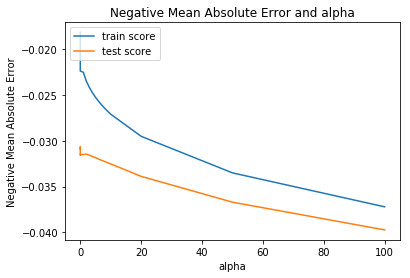

In [675]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [676]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_lm, y_train)
ridge.coef_

array([ 0.00000000e+00, -1.80125298e-02,  1.73242570e-03,  1.74826550e-02,
        8.14795048e-02,  4.65822207e-02,  7.13405337e-03,  1.69398370e-02,
        1.18577588e-02,  2.24149557e-02,  2.70782509e-02,  4.89974095e-02,
        3.73153948e-02,  3.49042324e-03,  5.58268000e-02,  4.99950222e-02,
        2.55394360e-02,  2.29877484e-02,  7.75717895e-03,  6.21252725e-03,
        1.26306873e-02,  1.43466547e-02, -7.39359630e-03,  1.61925093e-04,
       -3.35083282e-02,  3.57978917e-03,  4.97996095e-03,  1.71054692e-02,
        1.72745942e-02,  2.31055609e-02,  9.73411414e-03,  4.30628663e-03,
        7.95597778e-03, -9.83204466e-03, -1.33572554e-03,  1.01005857e-02,
        1.18666811e-02,  1.12603384e-02, -3.89905996e-03,  1.34217089e-02,
       -1.51846275e-02, -3.64282581e-03, -3.99055310e-03,  5.78711922e-03,
        1.39439895e-03, -2.21112855e-03, -9.31143459e-03,  2.15648951e-03,
        1.77573709e-02, -4.85710167e-03,  3.56961335e-02, -2.65737046e-02,
       -1.42531383e-02, -

In [677]:
X_train_lm.columns

Index(['const', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=264)

## Lasso regression

In [678]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_lm, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [679]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       0.024335         0.000399        -0.030286         -0.023514   
1       0.006383         0.000798        -0.035837         -0.033859   
2       0.005585         0.000399        -0.059415         -0.058839   
3       0.004987         0.000399        -0.101049         -0.100856   
4       0.004388         0.000000        -0.101049         -0.100856   

  param_alpha             params  rank_test_score  split0_test_score  \
0      0.0001  {'alpha': 0.0001}                1          -0.029181   
1       0.001   {'alpha': 0.001}                2          -0.034188   
2        0.01    {'alpha': 0.01}                3          -0.057636   
3        0.05    {'alpha': 0.05}                4          -0.101910   
4         0.1     {'alpha': 0.1}                4          -0.101910   

   split0_train_score  split1_test_score       ...         split2_test_score  \
0           -0.024050          -0.030873       ...                 -0.034361   
1           -0.034398          -0.037167       ...                 -0.037962   
2           -0.058895          -0.062314       ...                 -0.058620   
3           -0.100816          -0.101972       ...                 -0.099497   
4           -0.100816          -0.101972       ...                 -0.099497   

   split2_train_score  split3_test_score  split3_train_score  \
0           -0.023331          -0.027759           -0.024486   
1           -0.033454          -0.032499           -0.034667   
2           -0.059268          -0.055469           -0.059307   
3           -0.101213          -0.096597           -0.101808   
4           -0.101213          -0.096597           -0.101808   

   split4_test_score  split4_train_score  std_fit_time  std_score_time  \
0          -0.029262           -0.024745      0.005337        0.000489   
1          -0.037378           -0.034334      0.000489        0.000399   
2          -0.063042           -0.058380      0.000488        0.000489   
3          -0.105268           -0.099984      0.000631        0.000488   
4          -0.105268           -0.099984      0.000489        0.000000   

   std_test_score  std_train_score  
0        0.002262         0.001365  
1        0.002122         0.000817  
2        0.002860         0.000414  
3        0.002884         0.000625  
4        0.002884         0.000625  

[5 rows x 21 columns]

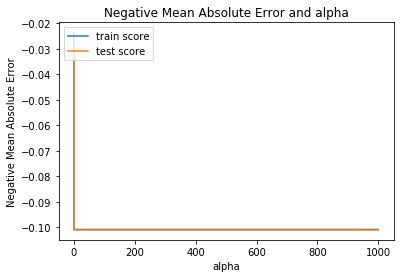

In [680]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [681]:
alpha =0.002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_lm, y_train) 

Lasso(alpha=0.002, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [682]:
lasso.coef_

array([ 0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        1.93517454e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  4.09250617e-02,
        1.67869672e-02,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -4.24955669e-02, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.52054109e-02, -9.37102464e-03,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -7.79027309e-03,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -

In [683]:
m=list(lasso.coef_)
m

[0.0,
 -0.0,
 0.0,
 0.0,
 0.19351745350996985,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.04092506168309061,
 0.01678696719115576,
 0.0,
 0.0,
 -0.0,
 0.0,
 0.0,
 -0.0,
 -0.0,
 -0.04249556691730994,
 -0.0,
 0.0,
 0.0,
 0.0,
 0.015205410926689407,
 -0.00937102464231509,
 0.0,
 0.0,
 -0.0,
 -0.007790273085109982,
 0.0,
 0.0,
 -0.0,
 -0.0,
 0.0,
 -0.0,
 -0.0,
 -0.0,
 0.0,
 0.0,
 -0.0,
 -0.0,
 0.0,
 0.0,
 -0.0,
 0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 0.0,
 0.0,
 -0.0,
 0.0,
 0.0,
 0.0,
 -0.0,
 0.0,
 -0.0,
 -0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.0,
 0.0,
 0.0,
 -0.0,
 -0.0,
 0.0,
 -0.0,
 0.0,
 -0.0,
 0.0,
 0.0,
 -0.0,
 0.0,
 -0.0,
 0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.0,
 -0.0,
 -0.00907438092223885,
 -0.0,
 0.0,
 0.0,
 0.0,
 -0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.0,
 -0.0,
 0.0,
 -0.0,
 0.0,
 -0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.0,
 0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 0.0,
 -0.0,
 0.0,
 -0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.0,
 0.0,
 -0.0,
 -0.0

In [689]:
#For finding the variables with highest-valued coefficients
sorted(list(lasso.coef_),reverse=True)

[0.19351745350996985,
 0.043691074835557696,
 0.04092506168309061,
 0.02218483188115997,
 0.020229701159820344,
 0.018280907761364512,
 0.017753666562601765,
 0.01752771729070507,
 0.01678696719115576,
 0.015872526524335597,
 0.015205410926689407,
 0.014533446307074252,
 0.013188523619847028,
 0.01286468437637099,
 0.0037292971568440836,
 0.002540921149316446,
 0.0,
 -0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.0,
 0.0,
 0.0,
 -0.0,
 -0.0,
 -0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.0,
 0.0,
 0.0,
 -0.0,
 -0.0,
 0.0,
 -0.0,
 -0.0,
 -0.0,
 0.0,
 0.0,
 -0.0,
 -0.0,
 0.0,
 0.0,
 -0.0,
 0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 0.0,
 0.0,
 -0.0,
 0.0,
 0.0,
 0.0,
 -0.0,
 0.0,
 -0.0,
 -0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.0,
 0.0,
 0.0,
 -0.0,
 -0.0,
 0.0,
 -0.0,
 0.0,
 -0.0,
 0.0,
 0.0,
 -0.0,
 0.0,
 -0.0,
 0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.0,
 -0.0,
 -0.0,
 0.0,
 0.0,
 0.0,
 -0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.0

In [690]:
for index, value in enumerate(list(X_train_lm.columns)): 
    print(index, value)

0 const
1 MSSubClass
2 LotFrontage
3 LotArea
4 OverallQual
5 OverallCond
6 MasVnrArea
7 BsmtFinSF1
8 BsmtFinSF2
9 BsmtUnfSF
10 TotalBsmtSF
11 1stFlrSF
12 2ndFlrSF
13 LowQualFinSF
14 GrLivArea
15 TotRmsAbvGrd
16 GarageArea
17 WoodDeckSF
18 OpenPorchSF
19 EnclosedPorch
20 3SsnPorch
21 ScreenPorch
22 PoolArea
23 MiscVal
24 AgeOfHouse
25 AgeOfGarage
26 AgeAfterSale
27 MSZoning_FV
28 MSZoning_RH
29 MSZoning_RL
30 MSZoning_RM
31 Street_Pave
32 LotShape_IR2
33 LotShape_IR3
34 LotShape_Reg
35 LandContour_HLS
36 LandContour_Low
37 LandContour_Lvl
38 Utilities_NoSeWa
39 LotConfig_CulDSac
40 LotConfig_FR2
41 LotConfig_FR3
42 LotConfig_Inside
43 LandSlope_Mod
44 LandSlope_Sev
45 Neighborhood_Blueste
46 Neighborhood_BrDale
47 Neighborhood_BrkSide
48 Neighborhood_ClearCr
49 Neighborhood_CollgCr
50 Neighborhood_Crawfor
51 Neighborhood_Edwards
52 Neighborhood_Gilbert
53 Neighborhood_IDOTRR
54 Neighborhood_MeadowV
55 Neighborhood_Mitchel
56 Neighborhood_NAmes
57 Neighborhood_NPkVill
58 Neighborhood_NWA

# Results:


## Forward Feature Selection

In [691]:
def calculate_aic(n, mse, num_params):
    aic = n * np.log(mse) + 2 * num_params
    return aic

def calculate_bic(n, mse, num_params):
    bic = n * np.log(mse) + np.log(n) * num_params
    return bic

In [692]:
features = X_train_lm.columns

regression = LinearRegression()

selected_features = []
min_aic = np.inf
for step in range(0, 10, 1):
    for feature in features:
        testing_features = selected_features + [feature]
        regression.fit(X_train_lm[testing_features], y_train)
        y_pred = regression.predict(X_test_m18[testing_features])
        mse = metrics.mean_squared_error(y_test, y_pred)
        num_params = len(regression.coef_) + 1  # features and intercept
        n = X_train.shape[0]
        aic = calculate_aic(n, mse, num_params)
        bic = calculate_bic(n, mse, num_params)
        if aic < min_aic:
            min_aic = aic
            current_bic = bic
            best_feature = feature
    selected_features = selected_features + [best_feature]
    print("Selected features: ", selected_features, "\nAIC: ", min_aic, "\nBIC: ", current_bic)

y_pred = regression.predict(X_test[selected_features])
print("\n\nFinal r-squared: ", metrics.r2_score(y_test, y_pred))

Selected features:  ['OverallQual'] 
AIC:  -5320.943675607458 
BIC:  -5311.086599971129
Selected features:  ['OverallQual', 'GrLivArea'] 
AIC:  -5602.668672092955 
BIC:  -5587.883058638461
Selected features:  ['OverallQual', 'GrLivArea', 'BsmtFinSF1'] 
AIC:  -5751.325683291639 
BIC:  -5731.61153201898
Selected features:  ['OverallQual', 'GrLivArea', 'BsmtFinSF1', 'MSZoning_RM'] 
AIC:  -5848.515848881909 
BIC:  -5823.8731597910855
Selected features:  ['OverallQual', 'GrLivArea', 'BsmtFinSF1', 'MSZoning_RM', 'GarageArea'] 
AIC:  -5929.547174461747 
BIC:  -5899.975947552759
Selected features:  ['OverallQual', 'GrLivArea', 'BsmtFinSF1', 'MSZoning_RM', 'GarageArea', 'OverallCond'] 
AIC:  -5996.021677660484 
BIC:  -5961.521912933331
Selected features:  ['OverallQual', 'GrLivArea', 'BsmtFinSF1', 'MSZoning_RM', 'GarageArea', 'OverallCond', 'Foundation_PConc'] 
AIC:  -6089.145953009517 
BIC:  -6049.7176504642
Selected features:  ['OverallQual', 'GrLivArea', 'BsmtFinSF1', 'MSZoning_RM', 'GarageA

In [693]:
regression.coef_

array([ 0.35002607,  0.34071709,  0.15466415, -0.05121964,  0.12547978,
        0.11063735,  0.03594718,  0.02946265,  0.18801919,  0.02102437])

### Code for Q and A part

In [694]:
#Q and A Ridge(DOUBLING ALPHA)

alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_lm, y_train)
ridge.coef_

array([ 0.00000000e+00, -1.61107534e-02,  4.25944822e-03,  1.16611895e-02,
        6.13382198e-02,  3.57429797e-02,  8.62592070e-03,  1.29631428e-02,
        8.32437160e-03,  1.99097605e-02,  2.15946484e-02,  3.58024779e-02,
        2.89499169e-02,  3.36463687e-03,  4.15413280e-02,  4.09945108e-02,
        2.28901116e-02,  1.89769897e-02,  8.45070185e-03,  3.83181223e-03,
        7.41421586e-03,  1.10859028e-02, -3.32307244e-03, -8.16546062e-05,
       -3.36028267e-02,  1.06195383e-03,  5.02421130e-03,  1.16441119e-02,
        1.01864974e-02,  1.73905798e-02,  2.55560216e-04,  3.62242306e-03,
        6.52389300e-03, -6.70206028e-03, -2.65957750e-03,  6.65047776e-03,
        8.67922622e-03,  7.02414892e-03, -2.12649347e-03,  1.27084640e-02,
       -1.22790182e-02, -2.01616343e-03, -3.98080515e-03,  4.98457613e-03,
        8.43354402e-04, -1.09922908e-03, -5.92785063e-03,  3.01339057e-03,
        1.35463972e-02, -5.88496096e-03,  2.95678656e-02, -2.34706709e-02,
       -1.58680854e-02, -

In [695]:
#Q and A lASSO(DOUBLING ALPHA)
alpha =0.004

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_lm, y_train) 

Lasso(alpha=0.004, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [696]:
#Q and A lASSO(DOUBLING ALPHA)
lasso.coef_

array([ 0.        , -0.        ,  0.        ,  0.        ,  0.08990092,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.03793151,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.01719941,
       -0.        ,  0.        ,  0.        , -0.        , -0.00591868,
        0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.  

In [697]:
X_train_lm.columns

Index(['const', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=264)

In [698]:
#Q and A 
X_train_lm =X_train_lm.drop(['OverallQual', 'GarageCars_3', 'TotRmsAbvGrd','CentralAir_Y','BsmtExposure_Gd'], axis = 1)

In [699]:
#Q and A 
#By Ridge
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_lm, y_train)
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
alpha =10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_lm, y_train)
ridge.coef_

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.9s finished


array([ 0.00000000e+00, -2.04917972e-02,  3.63977802e-03,  1.98216072e-02,
        5.35763869e-02,  9.74590106e-03,  2.17678319e-02,  1.49844398e-02,
        2.73737319e-02,  3.41881743e-02,  5.98193133e-02,  4.52857785e-02,
        5.71967313e-03,  6.81937352e-02,  3.33046382e-02,  2.51956537e-02,
        7.61960613e-03,  6.53544298e-03,  1.24463873e-02,  1.50703552e-02,
       -8.69212379e-03,  3.16585006e-04, -3.85817765e-02,  1.50403429e-03,
        6.11990430e-03,  1.83901390e-02,  1.81281860e-02,  2.58195814e-02,
        1.30088470e-02,  6.25453340e-03,  6.91901585e-03, -1.16865192e-02,
       -1.71804638e-03,  1.22088838e-02,  1.42821803e-02,  9.55022630e-03,
       -3.45414832e-03,  1.43729032e-02, -1.43171700e-02, -3.82298580e-03,
       -3.00384629e-03,  5.89770501e-03,  6.43233710e-04, -2.77683454e-03,
       -4.27112222e-03, -1.36418383e-05,  1.70372987e-02, -7.40478675e-03,
        3.62048085e-02, -2.90599067e-02, -1.83580747e-02, -3.39249984e-02,
       -3.03157895e-02, -

In [700]:
#Q and A 
#By Lasso
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_lm, y_train)
cv_results = pd.DataFrame(model_cv.cv_results_)
alpha =0.002

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_lm, y_train)
lasso.coef_

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.8s finished


array([ 0.        , -0.00220336,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.11948327,  0.09838416,
        0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.05563436, -0.        ,  0.        ,
        0.        ,  0.        ,  0.01900611, -0.00314084,  0.        ,
        0.        , -0.        , -0.00760962,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.00636193,
       -0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        ,  0.00820889, -0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        ,  0.00095539,  0.  

In [701]:
m=list(lasso.coef_)
m

[0.0,
 -0.002203359682384099,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.0,
 0.11948326899267538,
 0.09838416237114524,
 0.0,
 0.0,
 -0.0,
 0.0,
 0.0,
 -0.0,
 -0.0,
 -0.05563435835330946,
 -0.0,
 0.0,
 0.0,
 0.0,
 0.019006112812392062,
 -0.003140841827855518,
 0.0,
 0.0,
 -0.0,
 -0.007609616298021762,
 0.0,
 0.0,
 -0.0,
 -0.0,
 0.0,
 -0.0,
 -0.0,
 -0.0,
 0.0,
 0.0,
 -0.0,
 -0.0,
 0.0,
 0.0,
 -0.0,
 0.0,
 -0.006361931768589436,
 -0.0,
 -0.0,
 -0.0,
 0.0,
 0.0,
 -0.0,
 0.0,
 0.0,
 0.008208889209180054,
 -0.0,
 0.0,
 -0.0,
 -0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.0,
 0.0009553929455892432,
 0.0,
 -0.0,
 -0.0,
 0.0,
 -0.0,
 0.0,
 -0.0,
 0.0,
 0.0,
 -0.0,
 -0.0,
 -0.0,
 0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 0.0,
 -0.0,
 0.0,
 0.0,
 0.0,
 -0.0,
 -0.0,
 -0.01564533288485076,
 -0.0,
 0.0,
 0.0,
 0.0,
 -0.0,
 0.0,
 0.0,
 0.0,
 -0.0,
 0.0,
 0.0,
 -0.0,
 -0.0,
 0.0,
 -0.0,
 0.0,
 -0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.0,
 0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 0.0,
 -0.0,
 0.0,
 -0.0,
 0.0,
 0.0

In [702]:
m.index(0.02114091759335942)

222

In [703]:
#For finding the variables with highest-valued coefficients
sorted(list(lasso.coef_),reverse=True)

[0.11948326899267538,
 0.09838416237114524,
 0.0221626906606655,
 0.021391152396588144,
 0.02114091759335942,
 0.02052446840397102,
 0.019006112812392062,
 0.014300672557246985,
 0.014116590208216538,
 0.013796731290809813,
 0.012281985525328243,
 0.011309603793800853,
 0.008208889209180054,
 0.00562385830746517,
 0.001342422510452105,
 0.0009553929455892432,
 0.000646903870592457,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.0,
 0.0,
 0.0,
 -0.0,
 0.0,
 0.0,
 -0.0,
 -0.0,
 -0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.0,
 0.0,
 0.0,
 -0.0,
 -0.0,
 0.0,
 -0.0,
 -0.0,
 -0.0,
 0.0,
 0.0,
 -0.0,
 -0.0,
 0.0,
 0.0,
 -0.0,
 0.0,
 -0.0,
 -0.0,
 -0.0,
 0.0,
 0.0,
 -0.0,
 0.0,
 0.0,
 -0.0,
 0.0,
 -0.0,
 -0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.0,
 0.0,
 -0.0,
 -0.0,
 0.0,
 -0.0,
 0.0,
 -0.0,
 0.0,
 0.0,
 -0.0,
 -0.0,
 -0.0,
 0.0,
 -0.0,
 -0.0,
 -0.0,
 -0.0,
 0.0,
 -0.0,
 0.0,
 0.0,
 0.0,
 -0.0,
 -0.0,
 -0.0,
 0.0,
 0.0,
 0.0,
 -0.0,
 0.0,
 0.0,
 0.0,
 -0.0,
 0.0,
 0.0,
 -0.0,
 -0.0

In [704]:
for index, value in enumerate(list(X_train_lm.columns)): 
    print(index, value)

0 const
1 MSSubClass
2 LotFrontage
3 LotArea
4 OverallCond
5 MasVnrArea
6 BsmtFinSF1
7 BsmtFinSF2
8 BsmtUnfSF
9 TotalBsmtSF
10 1stFlrSF
11 2ndFlrSF
12 LowQualFinSF
13 GrLivArea
14 GarageArea
15 WoodDeckSF
16 OpenPorchSF
17 EnclosedPorch
18 3SsnPorch
19 ScreenPorch
20 PoolArea
21 MiscVal
22 AgeOfHouse
23 AgeOfGarage
24 AgeAfterSale
25 MSZoning_FV
26 MSZoning_RH
27 MSZoning_RL
28 MSZoning_RM
29 Street_Pave
30 LotShape_IR2
31 LotShape_IR3
32 LotShape_Reg
33 LandContour_HLS
34 LandContour_Low
35 LandContour_Lvl
36 Utilities_NoSeWa
37 LotConfig_CulDSac
38 LotConfig_FR2
39 LotConfig_FR3
40 LotConfig_Inside
41 LandSlope_Mod
42 LandSlope_Sev
43 Neighborhood_Blueste
44 Neighborhood_BrDale
45 Neighborhood_BrkSide
46 Neighborhood_ClearCr
47 Neighborhood_CollgCr
48 Neighborhood_Crawfor
49 Neighborhood_Edwards
50 Neighborhood_Gilbert
51 Neighborhood_IDOTRR
52 Neighborhood_MeadowV
53 Neighborhood_Mitchel
54 Neighborhood_NAmes
55 Neighborhood_NPkVill
56 Neighborhood_NWAmes
57 Neighborhood_NoRidge
58 